<a href="https://colab.research.google.com/github/sepse/COVAir-Balkans/blob/main/balkan_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np 
import pandas as pd
from datetime import datetime
import folium

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [95]:
covid = '/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/covid/owid-covid-data.csv'

In [96]:
cov = pd.read_csv(covid, sep=',')

In [97]:
cov = cov.drop(['iso_code', 'continent'], axis=1)
cov.sample(10)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
150569,Seychelles,2020-10-01,142.0,1.0,0.429,NaN,NaN,NaN,1435.649,10.110,...,7.1,35.7,NaN,3.60,73.40,0.796,NaN,NaN,NaN,NaN
7039,Argentina,2021-07-07,4593763.0,19423.0,17627.000,97439.0,456.0,447.857,100727.554,425.889,...,16.2,27.7,NaN,5.00,76.67,0.845,NaN,NaN,NaN,NaN
167874,Thailand,2020-07-29,3298.0,1.0,8.714,58.0,0.0,0.000,47.147,0.014,...,1.9,38.8,90.670,2.10,77.15,0.777,NaN,NaN,NaN,NaN
128113,Norway,2021-03-16,82455.0,1150.0,853.000,641.0,1.0,1.286,15086.095,210.406,...,19.6,20.7,NaN,3.60,82.40,0.957,NaN,NaN,NaN,NaN
65695,Gibraltar,2020-12-25,1534.0,58.0,50.000,6.0,0.0,0.000,45531.448,1721.528,...,NaN,NaN,NaN,NaN,79.93,NaN,NaN,NaN,NaN,NaN
21112,Bolivia,2022-02-07,874906.0,3157.0,2743.000,21171.0,42.0,31.429,73938.201,266.798,...,NaN,NaN,25.383,1.10,71.51,0.718,NaN,NaN,NaN,NaN
34592,Chile,2021-06-25,1537471.0,5599.0,4638.571,32012.0,215.0,107.571,80025.090,291.427,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
137371,Portugal,2020-12-17,362616.0,4320.0,3915.571,5902.0,87.0,89.143,35662.741,424.866,...,16.3,30.0,NaN,3.39,82.05,0.864,NaN,NaN,NaN,NaN
14599,Bangladesh,2021-12-10,1578819.0,269.0,249.857,28017.0,1.0,4.000,9493.601,1.618,...,1.0,44.7,34.808,0.80,72.59,0.632,NaN,NaN,NaN,NaN
107758,Marshall Islands,2021-06-06,4.0,0.0,0.000,NaN,NaN,NaN,67.094,0.000,...,NaN,NaN,82.502,2.70,73.70,0.704,NaN,NaN,NaN,NaN


In [98]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188788 entries, 0 to 188787
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   location                                    188788 non-null  object 
 1   date                                        188788 non-null  object 
 2   total_cases                                 181315 non-null  float64
 3   new_cases                                   181040 non-null  float64
 4   new_cases_smoothed                          179866 non-null  float64
 5   total_deaths                                162915 non-null  float64
 6   new_deaths                                  162903 non-null  float64
 7   new_deaths_smoothed                         161741 non-null  float64
 8   total_cases_per_million                     180478 non-null  float64
 9   new_cases_per_million                       180203 non-null  float64
 

In [99]:
cov['date'] = pd.to_datetime(cov['date'])

In [100]:
print(f"The available data is between {cov['date'].min()} and {cov['date'].max()}")

The available data is between 2020-01-01 00:00:00 and 2022-05-23 00:00:00


In [101]:
balkan = (cov.loc[cov['location'].isin(['Albania','Kosovo', 'North Macedonia', 'Serbia', 'Bosnia and Herzegovina', 'Croatia'])])
 
balkan.sample(10)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
40723,Croatia,2021-10-18,428233.0,319.0,1457.857,8907.0,11.0,18.429,104916.459,78.155,...,34.3,39.9,NaN,5.54,78.49,0.851,NaN,NaN,NaN,NaN
40784,Croatia,2021-12-18,673427.0,3487.0,3080.571,11930.0,51.0,50.857,164988.631,854.310,...,34.3,39.9,NaN,5.54,78.49,0.851,NaN,NaN,NaN,NaN
22719,Bosnia and Herzegovina,2022-02-22,369230.0,495.0,520.143,15362.0,35.0,33.571,113140.689,151.680,...,30.2,47.7,97.164,3.50,77.40,0.780,NaN,NaN,NaN,NaN
90370,Kosovo,2020-04-02,125.0,13.0,7.714,1.0,0.0,0.000,70.141,7.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40737,Croatia,2021-11-01,471474.0,1126.0,3638.429,9251.0,31.0,27.286,115510.441,275.868,...,34.3,39.9,NaN,5.54,78.49,0.851,NaN,NaN,NaN,NaN
125988,North Macedonia,2020-03-02,1.0,0.0,0.143,NaN,NaN,NaN,0.480,0.000,...,NaN,NaN,NaN,4.28,75.80,0.774,NaN,NaN,NaN,NaN
126566,North Macedonia,2021-10-01,191820.0,412.0,380.143,6683.0,15.0,18.000,92103.324,197.824,...,NaN,NaN,NaN,4.28,75.80,0.774,NaN,NaN,NaN,NaN
90751,Kosovo,2021-04-18,101191.0,862.0,757.857,2080.0,19.0,16.000,56781.409,483.695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22417,Bosnia and Herzegovina,2021-04-26,195971.0,1238.0,688.143,8350.0,147.0,58.857,60050.088,379.352,...,30.2,47.7,97.164,3.50,77.40,0.780,NaN,NaN,NaN,NaN
2450,Albania,2022-05-04,275211.0,20.0,40.286,3496.0,0.0,0.000,95794.404,6.962,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN


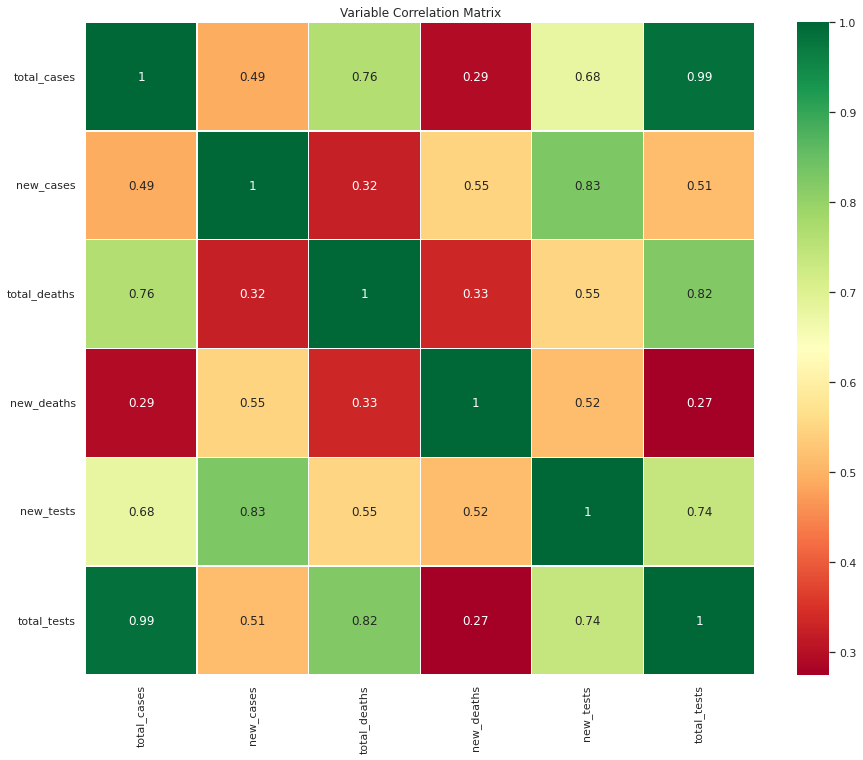

In [102]:
bal = balkan[['date','total_cases','new_cases','total_deaths','new_deaths','new_tests','total_tests']]

sns.heatmap(bal.corr(),annot=True,cmap='RdYlGn',linewidths=0.2).set_title("Variable Correlation Matrix") 
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.show()

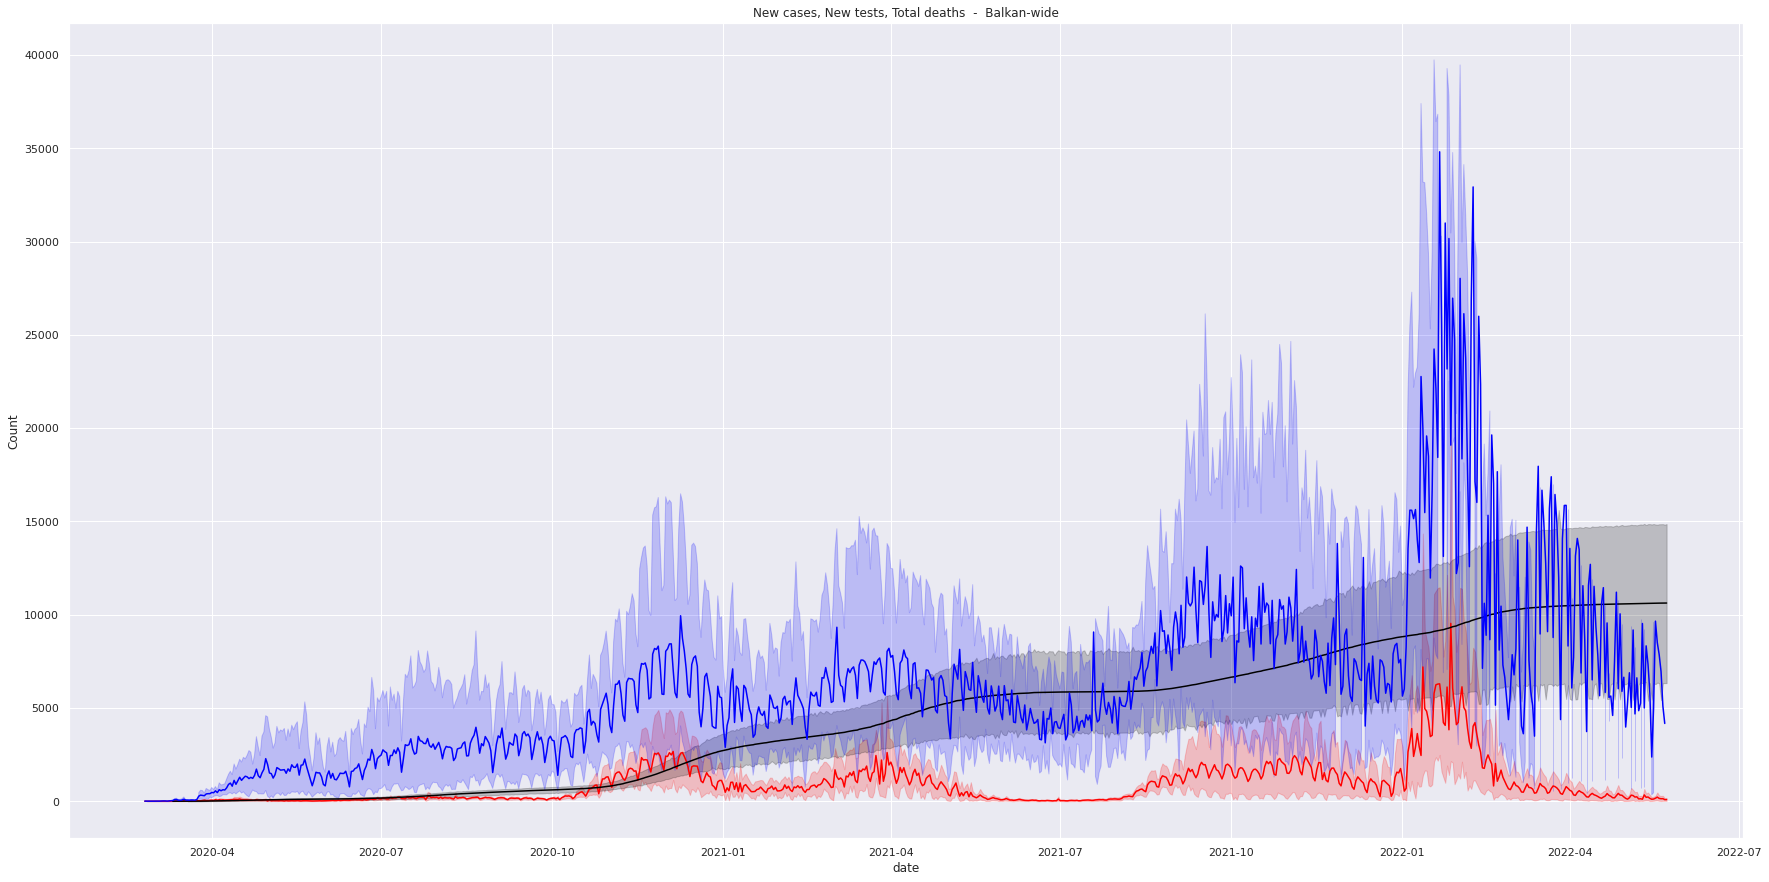

In [103]:
sns.set_style('darkgrid')

# Construct plot
#sns.lineplot(x = "date", y = "total_cases", data = kos)
sns.set(rc={'figure.figsize':(30,15)})
#plt.show()

sns.lineplot(x="date", y="new_cases", data=bal, color='red').set_title("New cases, New tests, Total deaths  -  Balkan-wide")
sns.lineplot(x="date", y="total_deaths", data=bal, color='black')
sns.lineplot(x="date", y="new_tests", data=bal, color='blue')
# set label
plt.ylabel("Count")

plt.show()

Text(0.5, 1.0, 'Croatia')

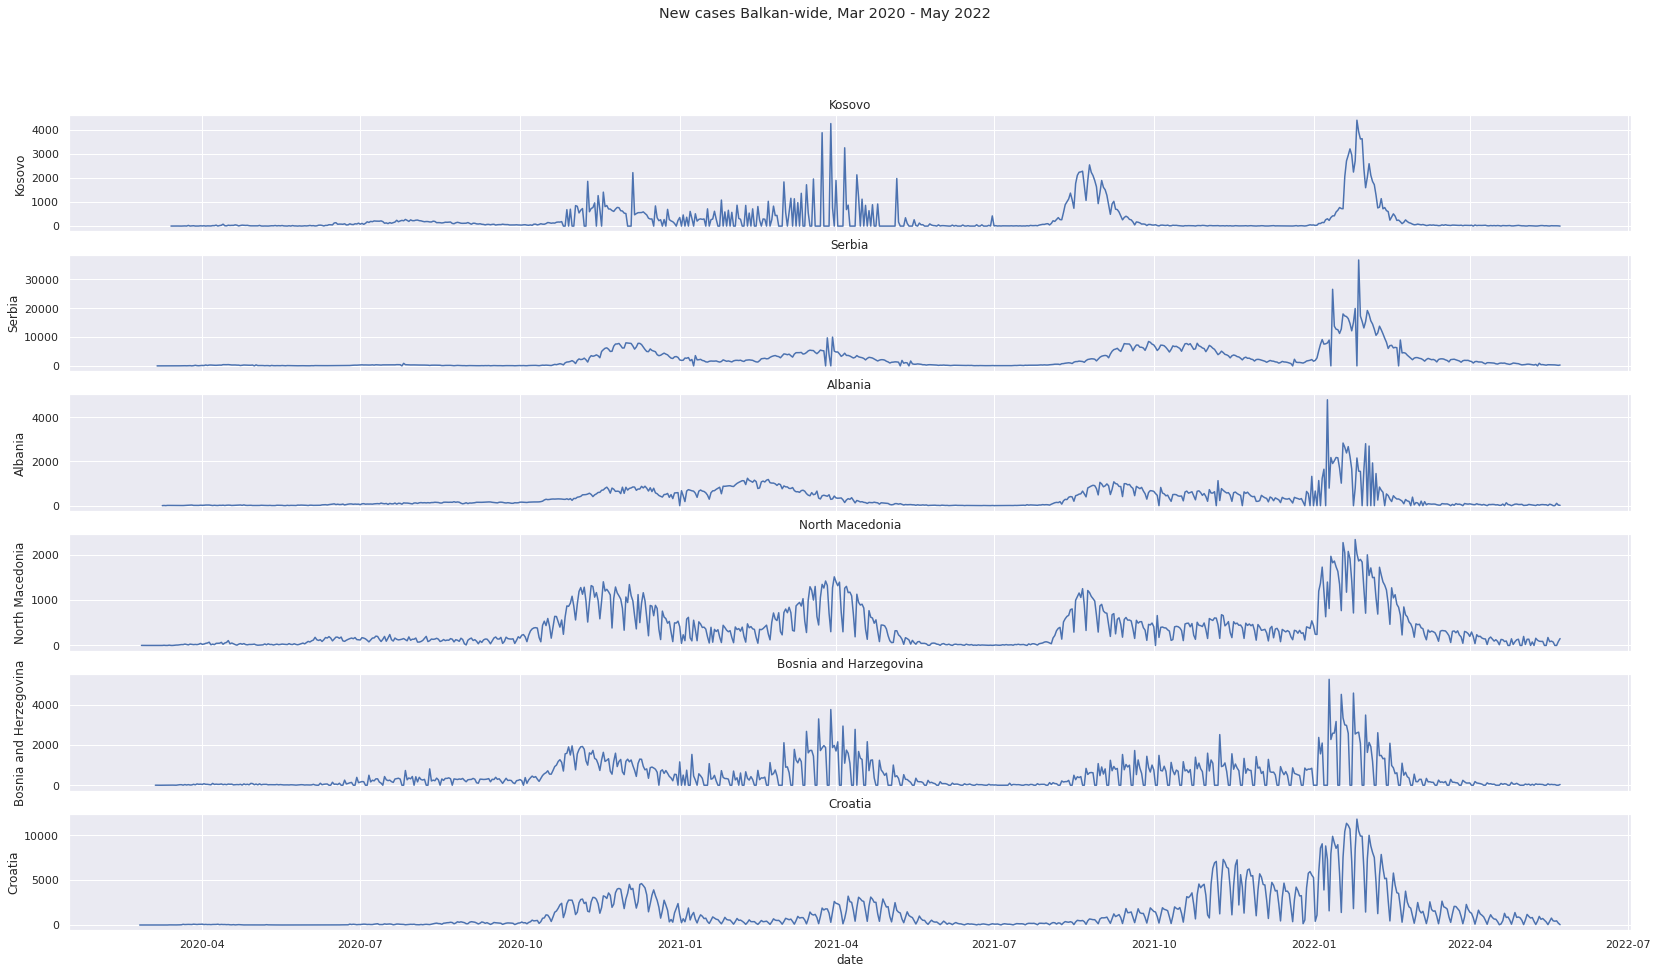

In [104]:
bal_pivot = balkan.pivot(index='date', columns='location', values='new_cases')

fig, axes = plt.subplots(6, 1, figsize=(28, 15), sharex=True)
fig.suptitle('New cases Balkan-wide, Mar 2020 - May 2022')

sns.lineplot(ax=axes[0], x=bal_pivot.index, y=bal_pivot['Kosovo'], data=bal_pivot).set_title("Kosovo")
sns.lineplot(ax=axes[1], x=bal_pivot.index, y=bal_pivot['Serbia'], data=bal_pivot).set_title("Serbia")
sns.lineplot(ax=axes[2], x=bal_pivot.index, y=bal_pivot['Albania'], data=bal_pivot).set_title("Albania")
sns.lineplot(ax=axes[3], x=bal_pivot.index, y=bal_pivot['North Macedonia'], data=bal_pivot).set_title("North Macedonia")
sns.lineplot(ax=axes[4], x=bal_pivot.index, y=bal_pivot['Bosnia and Herzegovina'], data=bal_pivot).set_title("Bosnia and Harzegovina")
sns.lineplot(ax=axes[5], x=bal_pivot.index, y=bal_pivot['Croatia'], data=bal_pivot).set_title("Croatia")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


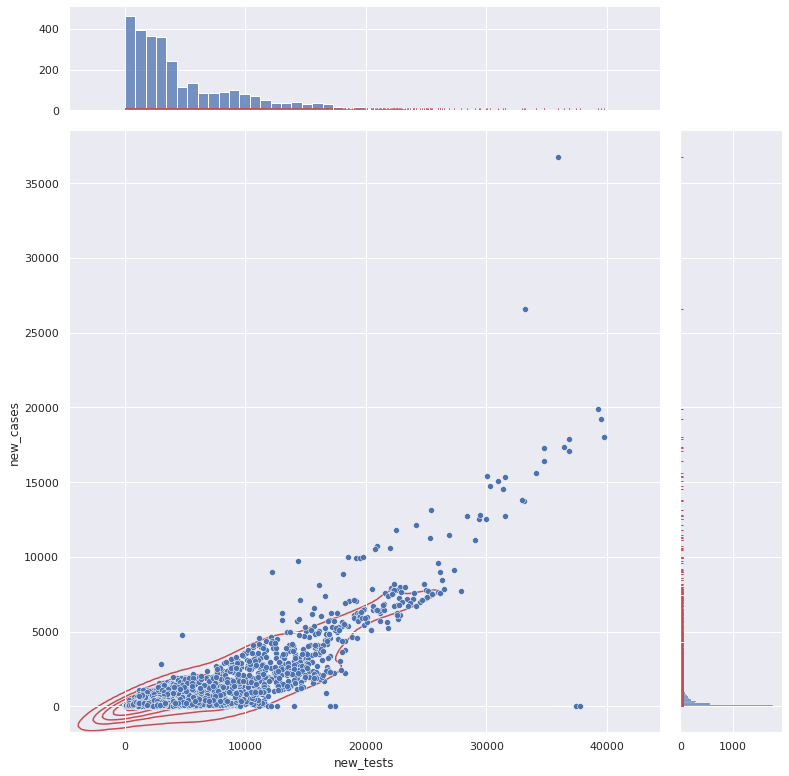

In [105]:
h = sns.jointplot("new_tests", "new_cases", data=balkan, marginal_ticks=True, height=11)
h.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
h.plot_marginals(sns.rugplot, color="r", clip_on=False)

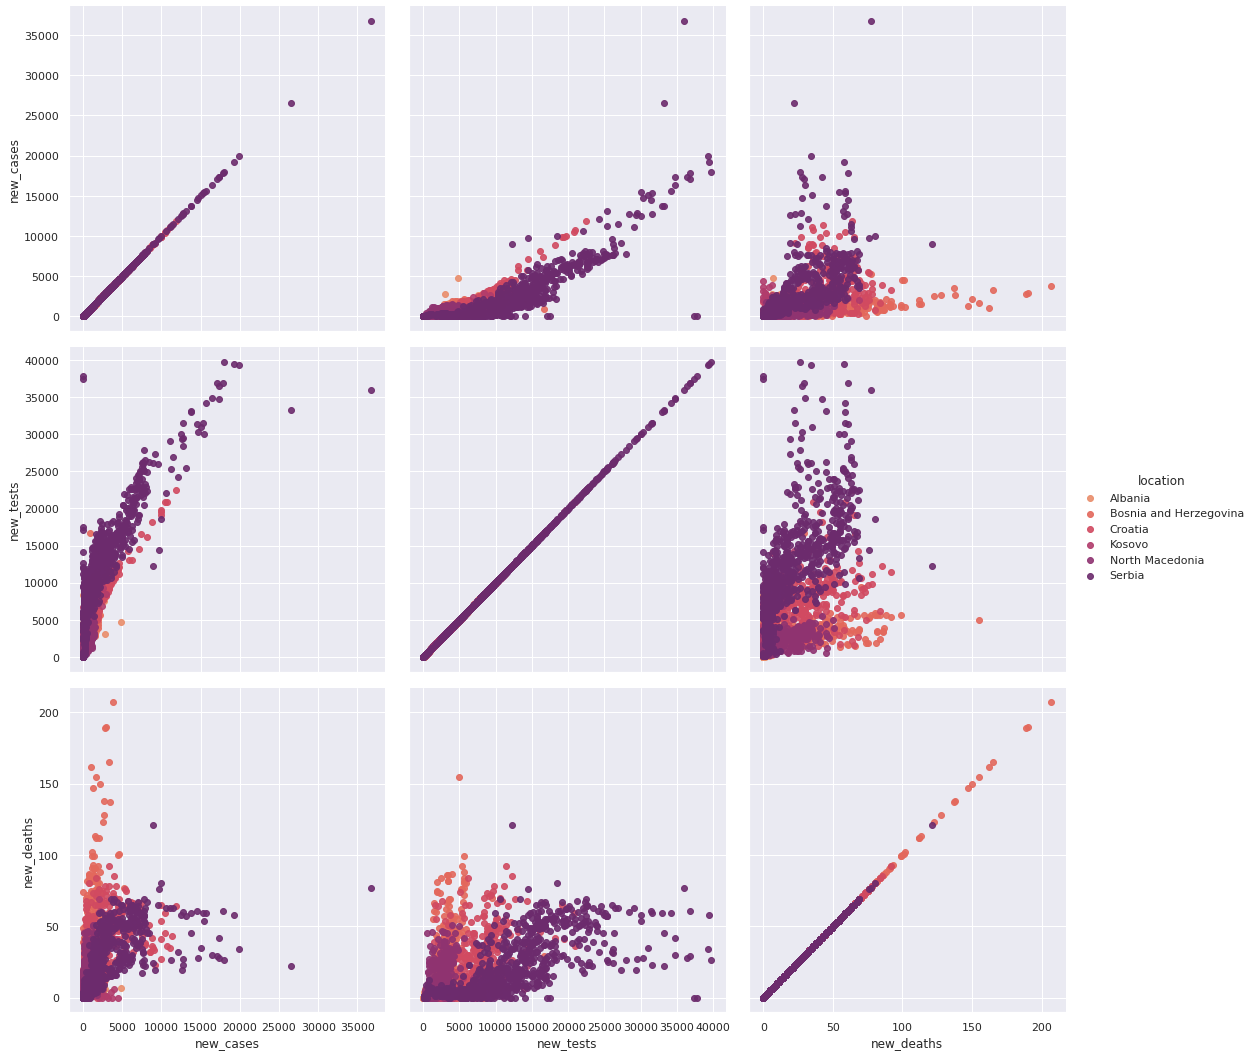

In [106]:

g = sns.PairGrid(data=balkan, vars=['new_cases', 'new_tests', 'new_deaths'], hue='location', palette="flare", height=5)
g.map(plt.scatter, alpha=0.9)
g.add_legend();